In [10]:
source('source.r')

Packages Loaded:
ncdf4 R.matlab openxlsx RColorBrewer compiler lattice geosphere readxl data.table rworldmap rworldxtra


In [11]:
ctd = read.xlsx('Raw Data/CTD/DataZoo - P1706 CTD Downcast Data.xlsx')
ctd$Time = conv_excel_time(ctd$DateTime, tz = 'UTC')

str(ctd)

'data.frame':	41780 obs. of  35 variables:
 $ Cruise          : chr  "CCE-P1706" "CCE-P1706" "CCE-P1706" "CCE-P1706" ...
 $ Cycle           : chr  "Cycle0" "Cycle0" "Cycle0" "Cycle0" ...
 $ EventNo         : num  3 3 3 3 3 3 3 3 3 3 ...
 $ Cast            : num  1 1 1 1 1 1 1 1 1 1 ...
 $ DateTime        : num  42888 42888 42888 42888 42888 ...
 $ Direction       : chr  "down" "down" "down" "down" ...
 $ Pressure        : num  2 3 4 5 6 7 8 9 10 11 ...
 $ Depth           : num  1.99 2.98 3.97 4.96 5.96 ...
 $ T090C           : num  16.9 16.8 16.9 16.9 16.8 ...
 $ T190C           : num  16.8 16.8 16.9 16.9 16.8 ...
 $ Cond1           : num  4.3 4.29 4.3 4.3 4.29 ...
 $ Cond2           : num  4.29 4.29 4.3 4.3 4.3 ...
 $ Sal00           : num  33.4 33.4 33.4 33.4 33.4 ...
 $ Sal11           : num  33.4 33.4 33.4 33.4 33.4 ...
 $ O2              : num  195 196 195 195 195 ...
 $ O2.Sat          : num  81 81.1 81 80.9 80.8 ...
 $ PAR.surface     : num  8632 8632 8632 8632 8632 ...
 $ PAR  

In [12]:
ctd.log = read.xlsx('Raw Data/CTD/DataZoo - P1706 CTD Cast Log.xlsx', sheet='Data')
ctd.log$time = conv_excel_time(ctd.log$DateTime, tz = 'GMT')

str(ctd.log)

'data.frame':	90 obs. of  11 variables:
 $ Cruise      : chr  "CCE-P1706" "CCE-P1706" "CCE-P1706" "CCE-P1706" ...
 $ Cycle       : chr  "Cycle0" "Cycle0" "Cycle0" "Transect1" ...
 $ EventNo     : num  3 14 127 130 136 141 146 154 161 168 ...
 $ Cast        : num  1 2 3 4 5 6 7 8 9 10 ...
 $ Station.Type: chr  "test" "test" "experimental" "transect" ...
 $ DateTime    : num  42888 42889 42893 42894 42894 ...
 $ Lat         : num  33.1 34.3 33.9 34.9 34.9 ...
 $ Lon         : num  -118 -120 -122 -121 -121 ...
 $ Notes       : chr  "SPAR off" "Santa Barbara Basin (Nuts are off at depth). no PAR sensor SPAR off" "no PAR sensor" NA ...
 $ Actions     : chr  "deleted SPAR values" "deleted SPAR values" NA NA ...
 $ time        : POSIXct, format: "2017-06-01 17:16:19" "2017-06-02 12:10:50" ...


In [13]:
add.position = function(ctd, ctd.log) {
    ctd$Lat = NA
    ctd$Lon = NA
    ctd$Type = NA
    
    rej = c()
    for (i in 1:nrow(ctd)) {
        l = which(ctd.log$EventNo == ctd$EventNo[i])

        if (length(l) == 1) {
            ctd$Lat[i] = ctd.log$Lat[l]
            ctd$Lon[i] = ctd.log$Lon[l]
            ctd$Type = ctd.log$Station.Type[l]
        } else {
            rej = c(rej, i)
        }
    }
    print(paste0('Number of unmatched bins: ', length(rej)))
    ctd
}

In [14]:
ctd = add.position(ctd, ctd.log)

[1] "Number of unmatched bins: 3440"


In [15]:
save(ctd, file = 'RStates/CTD.all.rdata')

In [16]:
ctd = ctd[!is.na(ctd$Lat),]
save(ctd, file = 'RStates/CTD.pos.rdata')

In [17]:
nrow(ctd)

[1] 38340

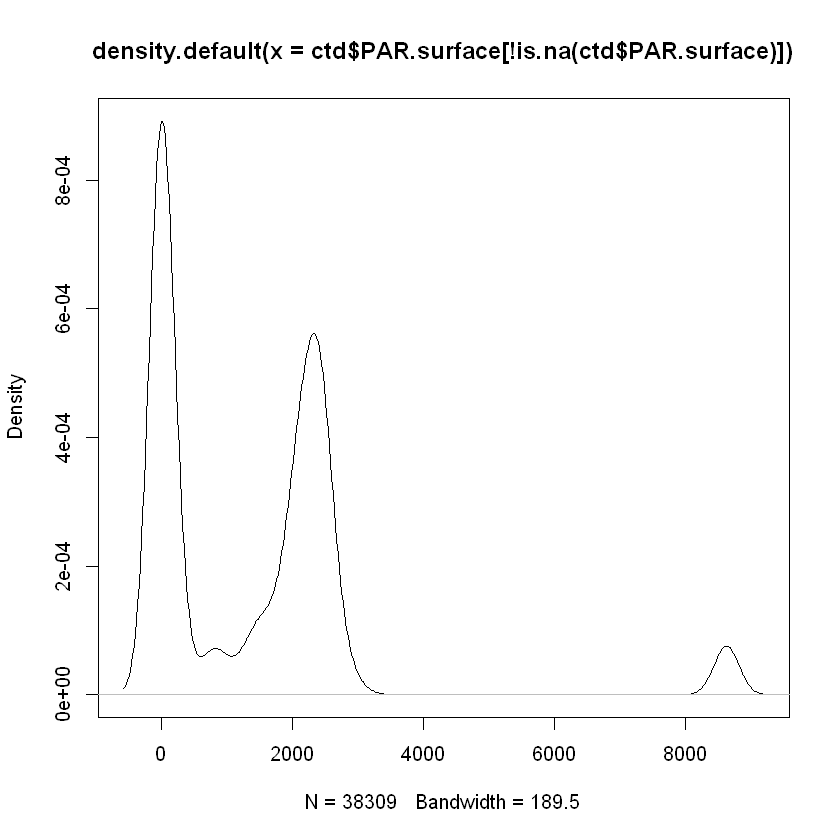

In [23]:
plot(density(ctd$PAR.surface[!is.na(ctd$PAR.surface)]))